### Unit 6: Inter-Group Differences: T-Testing & ANOVA

Kyle P. Rasku MS BSN RN

In this notebook we'll re-affirm our understanding of T-Testing, which began during the last unit, with a brief review of Two-Sample T-Testing.

Then, we'll perform Type 1 ANOVA, or Analysis of Variance. 

We'll spiral our understanding of ANOVA next week, when we ground it in the context of MANOVA and Regression in Unit 7.

#### We'll also take a bit of time to explore the assumptions of T-Testing and ANOVA and how to test for them.

When we're uncertain whether our data are normally-distributed, homoskedastic, or roughly equal in variance, we must test these assumptions to ensure that it would be appropriate to use on of these **parametric** tests (T-Tests, ANOVA). 

In the next notebook ("6b. Using Non-Parametric Tests"), we'll look at **non-parametric** tests we can use instead, when data isn't normal / Gaussian in nature!


In [1]:
%matplotlib inline
import matplotlib.pylab
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(12,10))
import pandas as pd
import numpy as np
import datetime
import math

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

In [3]:
heart = pd.read_csv("https://archive.ics.uci.edu/static/public/45/data.csv")
heart_backup = heart.copy()
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
categorical_columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]
for c in categorical_columns:
    heart[c] = pd.Categorical(heart[c])

In [5]:
heart_categorical = heart[["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]].copy()
heart_continuous = heart[["age", "trestbps", "chol", "thalach", "oldpeak", "ca", "num"]].copy()

In [6]:
heart_categorical.describe()

,sex,cp,fbs,restecg,exang,slope,thal
count,303,303,303,303,303,303,301.0
unique,2,4,2,3,2,3,3.0
top,1,4,0,0,0,1,3.0
freq,206,144,258,151,204,142,166.0


In [7]:
heart_continuous.describe()

,age,trestbps,chol,thalach,oldpeak,ca,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604,0.672241,0.937294
std,9.038662,17.599748,51.776918,22.875003,1.161075,0.937438,1.228536
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000,0.000000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.600000,1.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,4.000000


In [8]:
# Add IQR, variance and range
heart_summary = heart_continuous.describe().transpose()

heart_summary["IQR"] = heart_summary["75%"] - heart_summary["25%"]
heart_summary["range"] = heart_summary["max"] - heart_summary["min"]
heart_summary["var"] = heart_summary["std"]*heart_summary["std"]

heart_summary = heart_summary.transpose()
heart_summary

,age,trestbps,chol,thalach,oldpeak,ca,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604,0.672241,0.937294
std,9.038662,17.599748,51.776918,22.875003,1.161075,0.937438,1.228536
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000,0.000000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.600000,1.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,4.000000
IQR,13.000000,20.000000,64.000000,32.500000,1.600000,1.000000,2.000000
range,48.000000,106.000000,438.000000,131.000000,6.200000,3.000000,4.000000


In [9]:
#divide data into male vs. female sets

males = heart[heart["sex"]==1].copy()
females = heart[heart["sex"]==0].copy()

males.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [10]:
females.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
11,56,0,2,140,294,0,2,153,0,1.3,2,0.0,3.0,0
18,48,0,3,130,275,0,0,139,0,0.2,1,0.0,3.0,0


In [11]:
print(males.shape)
print(females.shape)

(206, 14)
(97, 14)


We created two groups using males vs. females.

Now, let's create three groups, using patients' ages.

To decide where to separate the three groups, let's first look at the range of ages represented in the data.

<Axes: >

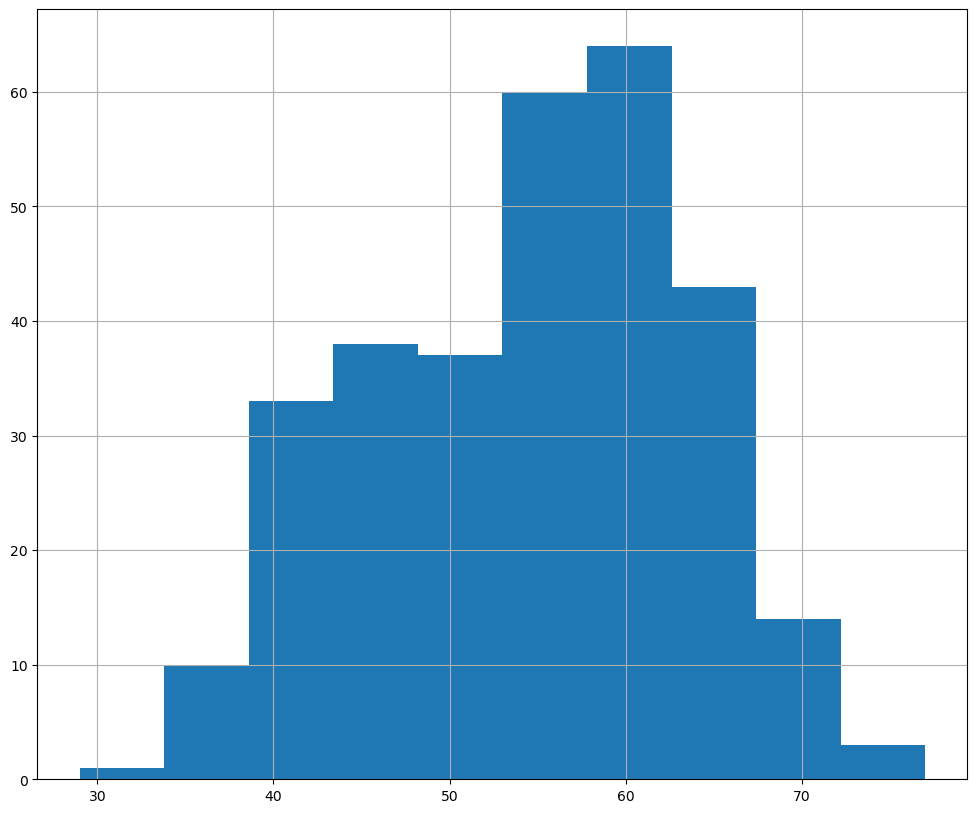

In [13]:
heart["age"].hist()

The ages seem to range from late 20s to late 70s, with the majority of patient ages falling between 45 and 65.  

The data is roughly normally distributed.

Based on this and our understanding of life-stages, let's divide the data into ages 0-45, 45-60, and 60+

In [23]:
# Create an age-group field: age < 45: group 1, age 45-59: group 2, age 60+: group 3

heart.loc[heart['age'] < 45, 'age_group'] = 1
heart.loc[(heart['age'] > 44) & (heart['age'] < 60), 'age_group'] = 2
heart.loc[heart['age'] > 59, 'age_group'] = 3
heart['age_group'] = heart['age_group'].astype('Int64')

heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,age_group
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,3
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,3
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,1
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,1


### We're Still Hypothesis Testing!

Review: There must always be a hypothesis to test, for power and statistical significance to matter.

We must:
1. Calculate power
2. Set the significance level (alpha)
3. State the null and alternative hypotheses
4. **Ensure the data meets the test requirements (new)**
5. Conduct the correct test

In the prior lecture, we conducted our tests on normally distributed data, and didn't dig into the test assumptions.  

Here we'll review what we already know about hypothesis testing, but add in an important new level of sophistication - checking to see that the test assumptions are met before conducting the test and interpreting the results!

First, we'll perform a power calculation.  

Do we have sufficient observations (n=97, the size of the smaller group), to compare our two groups with 80% power, and alpha of 0.05? 

In [29]:
from statsmodels.stats.power import TTestPower

power = TTestPower()
n_test = power.solve_power(nobs=97, effect_size = 0.8,
                           power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))

Power: 1.000


### Great!  Looks like we have sufficient power to perform our two-sample t test 

Since we are using alpha = 0.05, we can assume the default alpha.

Now, let's state the hypotheses:

##### H0: The mean inital blood pressure for females is the same as the mean initial blood pressure for males at alpha = 0.05
##### HA: There is a significant difference in mean inital blood pressure between males and females at alpha=0.05



### Now, let's check the data to see if it meets requirements for a t test:

1. Independence: The observations in one sample are independent of the observations in the other sample.

The observations are independent, because they were not made on the same people, and people in one group were not dependent on anything in the other group so this one is met.

2. Normality: Both samples are approximately normally distributed.

3. Homogeneity of Variances: Both samples have approximately the same variance.

4. Random Sampling: Both samples were obtained using a random sampling method.

This one is also met.

So we just have to test #2 and #3.  If #3, Homogeneity of Variances, isn't met we can use Welch's t test instead.  Some people think you should just use Welch's test all the time. :)


array([<Axes: title={'center': 'trestbps'}>], dtype=object)

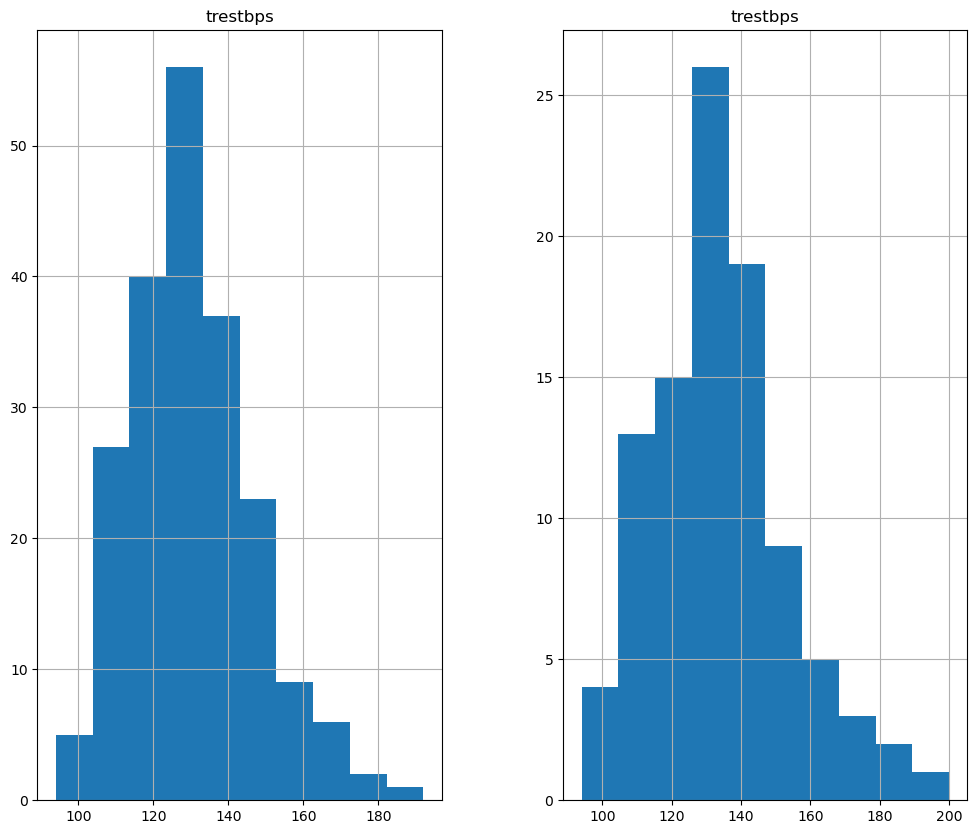

In [32]:
fig, axes = plt.subplots(1, 2)

males.hist('trestbps', bins=10, ax=axes[0])
females.hist('trestbps', bins=10, ax=axes[1])

These look roughly normally distributed, which is all that's required here.

Now, let's check the variances:

In [33]:
males['trestbps'].describe()

count    206.000000
mean     130.912621
std       16.691524
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      192.000000
Name: trestbps, dtype: float64

In [34]:
females['trestbps'].describe()

count     97.000000
mean     133.340206
std       19.376149
min       94.000000
25%      120.000000
50%      132.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [35]:
16.691524*16.691524

278.606973442576

In [36]:
19.376149*19.376149

375.4351500702011

The variance for males' initial BP is 278.61, and the variance for females' initial BP is 375.44

### The females variance is substantially higher than the males, so we must use Welch's test, which does not care about equal variance between the two samples.

In [38]:
from scipy import stats

stats.ttest_ind(males['trestbps'], females['trestbps'], equal_var=False)

Ttest_indResult(statistic=-1.0622273145438155, pvalue=0.2896813792526513)

### Power and Error Likelihood Review

At alpha of 0.05 / the 95% confidence interval, there is a 5% chance of a Type I error (we reject the null hypothesis and erroneously state that the study found significant differences when there indeed was no difference).

At power = 80%, there is a 20% chance of a Type II error (we declare no differences or associations between study groups when, in fact, there was).

However after calculating the T statistic above, we see that at alpha = 0.05, there is **no** statistically significant difference between males and females' average initial blood pressure.  We would **fail to reject** the NULL hypothesis, but at 80% power, there would be a 20% chance we did this in error.  


#### Significance in Medicine

In medicine, alpha of 0.05 may not provide enough certainty of true efficacy or a true difference between groups.  We don't want to reject the null unless we have solid evidence.  If we chose an alpha of 0.01 we would then have only a 1% chance of rejecting NULL in error, and if we selected alpha of 0.001, then, we would have a .1% chance of Type I error.


## One-way ANOVA

ANOVA stands for "Analysis of Variance" and is an omnibus test, meaning it tests for a difference overall between all groups. 

The one-way ANOVA, also referred to as one factor ANOVA, is a parametric test used to test for a statistically significant difference of an outcome between 3 or more groups. 

Since it is an omnibus test, it tests for a difference overall, i.e. at least one of the groups is statistically significantly different than the others. However, if the ANOVA is significant one cannot tell which group is different. In order to tell which group is different, one has to conduct planned or post-hoc comparisons. 

**As with all parametric tests, there are certain conditions that need to be met in order for the test results to be considered reliable.**

The reason why it's called an one-way or one factor ANOVA even though there are 3 or more groups being tested is because those groups are under one categorical variable, such as race or education level, and the name is referring to the number of variables in the analysis and not the number of groups. 

Just as we did above for the t test, we'll perform all the steps necessary to conduct the right test and interpret the result correctly:

1. Calculate power
2. Set the significance level (alpha)
3. State the null and alternative hypotheses
4. **Ensure the data meets the test requirements (new)**
5. Conduct the correct test

In [43]:
heart.groupby('age_group').count()['age']

age_group
1     55
2    157
3     91
Name: age, dtype: int64

In [44]:
# Calculate power
from statsmodels.stats.power import FTestAnovaPower

# perform power analysis
analysis = FTestAnovaPower()

n_test = analysis.solve_power(nobs=55, effect_size = 0.8,
                           power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))

Power: 1.000


The power is good; let's set alpha to 0.05 again.

#### The NULL hypothesis:

There is no difference in mean initial blood pressure between age groups.

#### The ALTERNATIVE hypothesis:

At least one of the three age groups is significantly different in average mean initial blood pressure.

Ensure the data means ANOVA requirements:

1. Independence
2. Normality
3. Homogeneity of Variance

We know the test of independence is met, so we'll move on to the other two.

array([<Axes: title={'center': 'trestbps'}>], dtype=object)

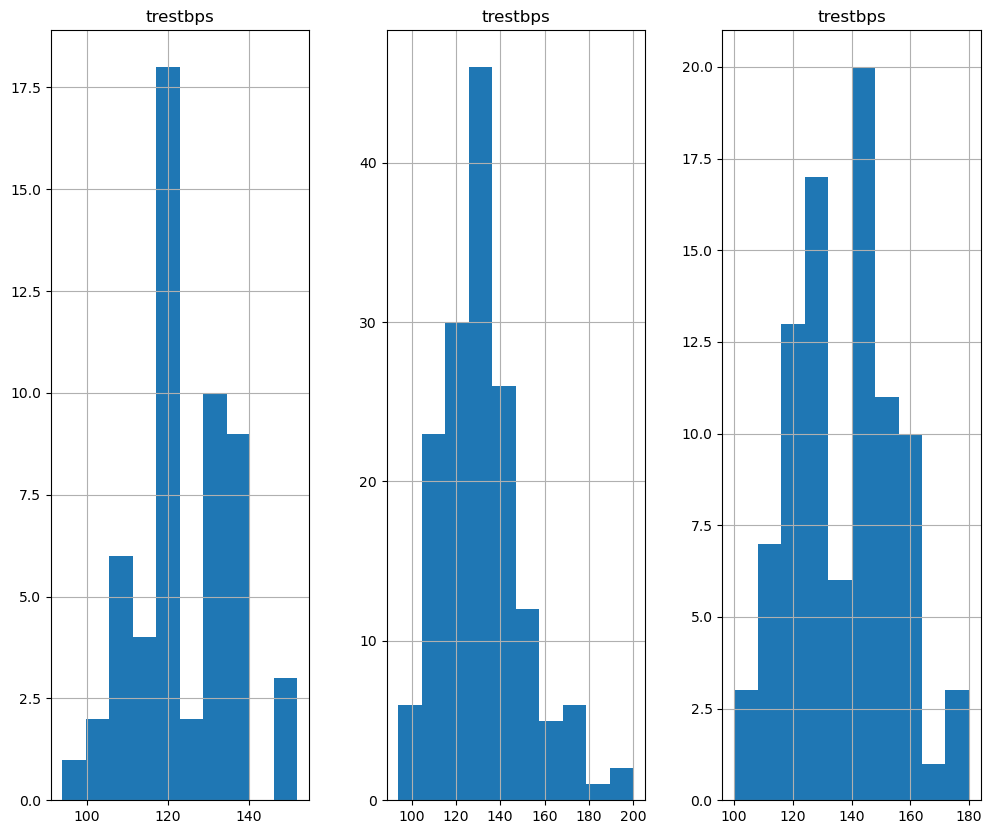

In [46]:
fig, axes = plt.subplots(1, 3)

heart[heart['age_group']==1].hist('trestbps', bins=10, ax=axes[0])
heart[heart['age_group']==2].hist('trestbps', bins=10, ax=axes[1])
heart[heart['age_group']==3].hist('trestbps', bins=10, ax=axes[2])

In [48]:
heart['age_group'] = pd.Categorical(heart['age_group'])

In [49]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('trestbps ~ C(age_group)', data=heart).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(age_group),5449.385276,2.0,9.27866,0.000123
Residual,88095.453008,300.0,NaN,NaN


This table provides all the information we need in order to reject the null hypothesis and conclude that one of the group means is significantly different from the others; however, it does not provide any effect size measures to tell us if the statistical significance is meaningful. 

The function below calculates eta-squared and omega-squared, where eta-squared is the same as R-squared but is considered a better measure of effect size because it is unbiased and calculation accounts for the # of degrees of freedom in the model.

In [50]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(age_group),5449.385276,2.0,2724.692638,9.27866,0.000123,0.058254,0.051813
Residual,88095.453008,300.0,293.651510,NaN,NaN,NaN,NaN


This isn't a very large effect size: eta-squared is only 0.06, indicating that age group accounts for 6% of the variation in initial blood pressure.

Now, let's ensure we are meeting test requirements by testing for normality and homogeneity of variance.

In [51]:
# Test for normality

import scipy.stats as stats

stats.shapiro(model.resid)

ShapiroResult(statistic=0.9742816686630249, pvalue=2.967475666082464e-05)

The p-value for the Shapiro test is insignificant, indicating that there is normality.

Now, we'll use the Levene test to ensure variances are similar:

In [52]:
stats.levene(heart['trestbps'][heart['age_group'] == 1],
             heart['trestbps'][heart['age_group'] == 2],
             heart['trestbps'][heart['age_group'] == 3])

LeveneResult(statistic=2.958316704142245, pvalue=0.053422538630848476)

This just barely passes Levene at alpha = 0.05. 

Let's visualize the data:
 

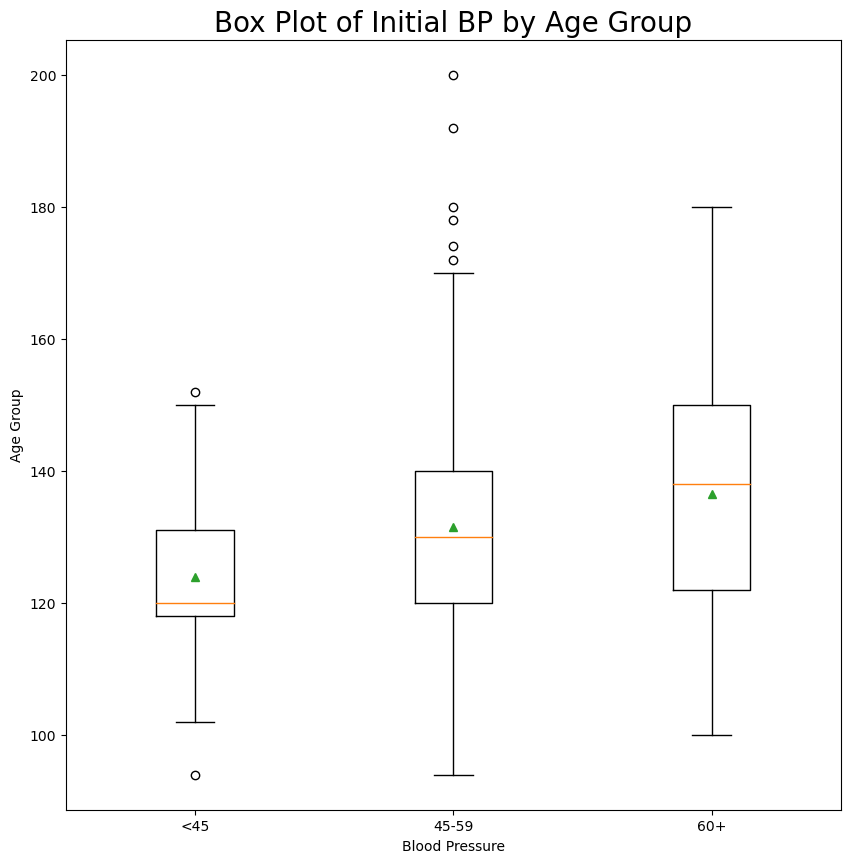

In [53]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Initial BP by Age Group", fontsize= 20)
ax.set

data = [heart['trestbps'][heart['age_group'] == 1],
        heart['trestbps'][heart['age_group'] == 2],
        heart['trestbps'][heart['age_group'] == 3]]

ax.boxplot(data,
           labels= ['<45', '45-59', '60+'],
           showmeans= True)

plt.xlabel("Blood Pressure")
plt.ylabel("Age Group")

plt.show()